In [3]:
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import matplotlib.pyplot as plt

Here is a simple simulation infecting a bunch of cells (n_cells) with some AAV particles. I will set a detection limit above which we will observe the presence of the AAV (using whatever given method you are using to detect expression).

Some cells will get more AAV particles than others and I am representing this variability by drawing virion counts from a Poisson distribution with mean count = lambda... it has been published that ~20 is an appropriate lambda value (i.e. mean number of virions per cell), I will double check the reference for that but its absolute value is less important than its relationship to the detection limit. 

In [224]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus (20 has been reported from here but the absolute value is not important rather its relationship to the detection limit)
lam_A = 20

# set the detection limits for each virus
detect_limit_A = 12

# generate the number of virions per cell for each virus
virions_A = np.random.poisson(lam=lam_A, size=n_cells)

Now I plot the distribution of the number of virions per cell and draw a line to show the detection limit (cells to the right of which are "positive" for the AAV.

Percentage of cells with detected virus = 97.845 %


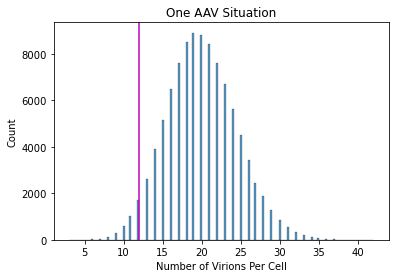

In [225]:
sns.histplot(virions_A)
plt.axvline(detect_limit_A,c="m")
plt.xlabel("Number of Virions Per Cell")
plt.title("One AAV Situation")
print(f"Percentage of cells with detected virus = {np.count_nonzero(virions_A>=detect_limit_A)/n_cells*100}","%")

At this detection limit almost all our cells (~98%)  will be said to express the AAV.

## Two virus situation:

First, I am defining a function to run the same thing as above but with two viruses now... 

In [246]:
def dual_infection(n_cells,lam_A,lam_B,detect_limit_A,detect_limit_B):
    # generate the number of virions per cell for each virus
    virions_A = np.random.poisson(lam=lam_A, size=n_cells)
    virions_B = np.random.poisson(lam=lam_B, size=n_cells)

    #observe your cells: 
    results = np.zeros(n_cells)
    results[(virions_A >= detect_limit_A) & (virions_B >= detect_limit_B)] = 3
    results[(virions_A >= detect_limit_A) & (virions_B < detect_limit_B)] = 2
    results[(virions_A < detect_limit_A) & (virions_B >= detect_limit_B)] = 1

    return results, virions_A, virions_B

Let's assume that the cell doesn't care which of the two AAVs it receives, however, the total number of viral particples that can enter a cell does not change, neither does the detection limit of your method:

In [247]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus 
#Note that I have halved this to (roughly) make sure that the overall number of virions per cell is the same as in the one virus situation: 
lam_A = 10
lam_B = 10

# assume the detection limits are unchanged and that they are the same for both viruses (clearly that may not always be true): 
detect_limit_A = 12
detect_limit_B = 12


results, virions_A, virions_B =dual_infection(n_cells,lam_A,lam_B,detect_limit_A,detect_limit_B)


#report the percentage expressing both:
perceboth=np.count_nonzero(results==3)/np.count_nonzero(results)*100

#report the percentage expressing only one or the other:
perconeorother=(np.count_nonzero(results==2)+np.count_nonzero(results==1))/np.count_nonzero(results)*100

#report the percentage of cells infected:
infected=np.count_nonzero(results)/n_cells*100

## Result 1:

Percentage of cells with detected virus = 51.676 %


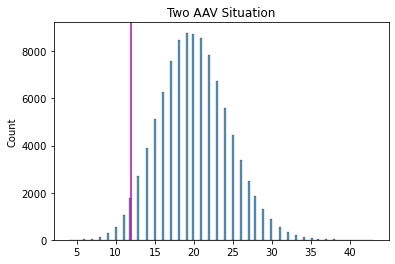

In [248]:
sns.histplot(virions_A+virions_B)
plt.axvline(detect_limit_A,c="m")
plt.title("Two AAV Situation")
print(f"Percentage of cells with detected virus = {infected}","%")

Although the distribution of virions per cell is identical to the single AAV situation and the detection limit is identical, as a consequence of where I have chosen to put the detection limit relative to the lambda values, here we are only able to detect viral expression in around 50% of cells! 

Very importantly, you would not be able to increase this by increasing the dose or titre of the AAVs because we are assuming that the cells are not able to take on more virus per individual cell and we are assuming that the cells don't care which AAV they take up (i.e. p(AAV_A) = p(AAV_B)).

## Result 2:

In [249]:
print(f"Percentage of cells with both AAVs detected = {perceboth}","%")
print(f"Percentage of cells with only on or other of the AAVs detected = {perconeorother}","%")

Percentage of cells with both AAVs detected = 17.687127486647576 %
Percentage of cells with only on or other of the AAVs detected = 82.31287251335243 %


Again, due to the relationship between the values I have chosen for the detecion limit and lambda, I can only detect both viruses in fewer than 20% of the cells that are co-transduced.

I can run the function above in a loop to see what the impact of the detection limit is on co-transduced cells (keeping lambda fixed at 20):

In [250]:
# set the number of cells to simulate
n_cells = 100000

# set the lambda values for each virus 
#Note that I have halved this to (roughly) make sure that the overall number of virions per cell is the same as in the one virus situation: 
lam_A = 10
lam_B = 10

data=[]
for detect_limit in range(1,21):
    results,v_A, V_B =dual_infection(n_cells,lam_A,lam_B,detect_limit,detect_limit)
    perceboth=np.count_nonzero(results==3)/np.count_nonzero(results)*100
    data.append(perceboth)

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Percentage of cells co-transduced')

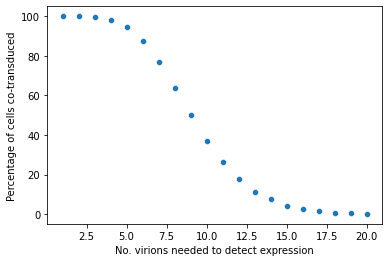

In [251]:
sns.scatterplot(range(1,21),data)
plt.xlabel("No. virions needed to detect expression")
plt.ylabel("Percentage of cells co-transduced")

The result is this sigmoidal curve, where the ability to get co-transduction starts to rapidly decline when the detction limit exceed around 25% of lambda and falls to near zero co-transduction when when the detection limit is around 75% of lambda. 

## Conclusion:

The interesting thing to come from this very simple simulation is that the only assumption needed to reproduce difficulties in co-transduction of a cell with two AAVs (or any virus for that matter) is that there is some limit to how many copies of a virus can successfully transduce a cell. 

Following from that, how difficult it might be to get co-transduction will really just depending on the sensitivity of your detection method and its relation to how many copies of a virus can transduce a cell. There is no need to think they outcompete - actually, I explicitly assume no competition whatsoever here (i.e. totally independent of each other and treated exactly the same by the cells).

Syd xx